# Load and Clean the Data

## import

In [515]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

## Setup

In [516]:
# Import packages and load the full dataset
%matplotlib inline

# Setup
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
pd.set_option('display.max_columns', None)

# Ignore the warnings
warnings.filterwarnings('ignore')

In [517]:
# !type ./houses/data_description.txt

## Load and vars

In [518]:
# Load the data
path_train = "data/houses/train.csv"
path_test = "data/houses/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

# Var names
target_feature = "SalePrice"

# Data Explo

In [519]:
# DUmmies
# Col : Heating

In [520]:
# ! cat houses/data_description.txt | grep -A 10 Heating

## Data shape

In [521]:
# Head
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [522]:
# shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
# (rows,columns)
df_train.shape

(1460, 81)

In [523]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [524]:
df_test.shape
# 1 column less because target variable isn't there in test set!
# Difference in Examples is pure random

(1459, 80)

## Variable Identification

In [525]:
# info method provides information about dataset like
# total values in each column, null/not null, datatype, memory occupied etc
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [526]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [527]:
# How many columns with different datatypes are there?
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [528]:
# Describe gives statistical information about numerical columns in the dataset
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

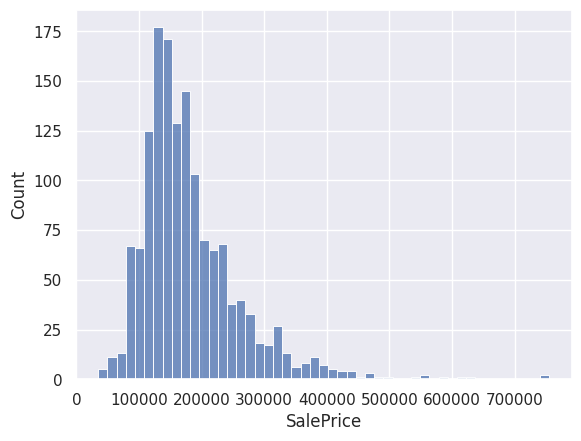

In [529]:
sns.histplot(df_train['SalePrice'])

## Correlation in Data

In [530]:
corr = df_train.select_dtypes(include="number").corr()[target_feature]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We do not care if correlation is positive or negative !

In [531]:
corr[np.argsort(abs(corr), axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass      -0.084284
OverallCond     -0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePr

Above 50% correlation with SalesPrice:

   - OverallQual
   - GrLivArea
   - GarageCars
   - GarageArea
   - TotalBsmtSF
   - 1stFlrSF
   - FullBath
   - TotRmsAbvGrd
   - YearBuilt
   - YearRemodAdd

In [532]:
f_interest = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "GarageYrBlt",
    "TotalBsmtSF",
    "1stFlrSF",
    "FullBath",
    "TotRmsAbvGrd",
    "YearBuilt",
    "YearRemodAdd",
] + [
    "CentralAir",
    "KitchenQual",
    "KitchenAbvGr",
    "Fireplaces",
    "FireplaceQu",
    "2ndFlrSF",
    "PoolArea",
]

In [533]:
f_interest

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'CentralAir',
 'KitchenQual',
 'KitchenAbvGr',
 'Fireplaces',
 'FireplaceQu',
 '2ndFlrSF',
 'PoolArea']

### SalePrice vs OverallQual

In [534]:
!cat data/houses/data_description.txt | grep -A 12 OverallQual

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	


<Figure size 1800x1800 with 0 Axes>

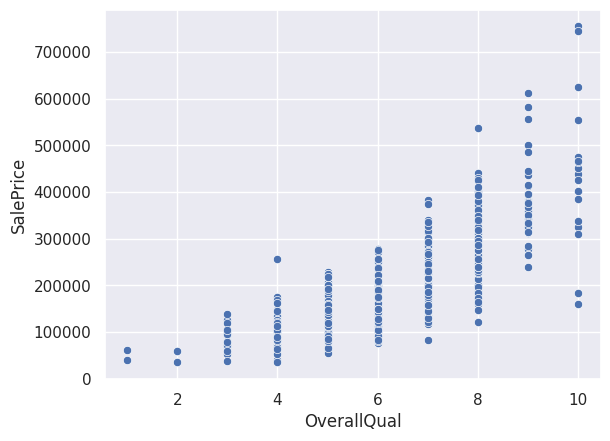

<Figure size 1800x1800 with 0 Axes>

In [535]:
sns.scatterplot(data=df_train, y='SalePrice', x='OverallQual')
plt.figure(figsize=(18, 18))

### SalePrice vs GrLivArea

In [536]:
!cat data/houses/data_description.txt | grep -A 1 GrLivArea

GrLivArea: Above grade (ground) living area square feet



<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

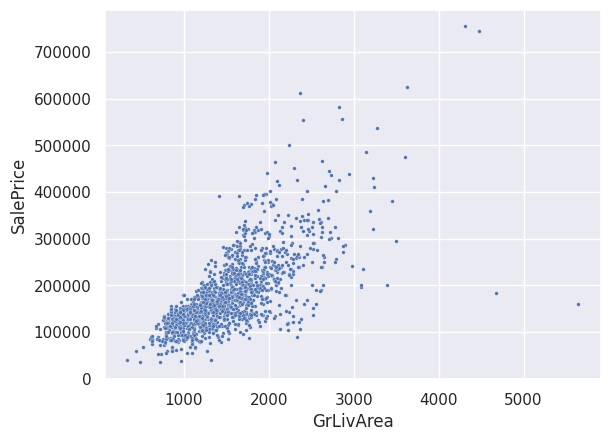

In [537]:
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea', s=7)

### SalePrice vs GarageArea

In [538]:
!cat data/houses/data_description.txt | grep -A 1 GarageArea

GarageArea: Size of garage in square feet



<Axes: xlabel='GarageArea', ylabel='SalePrice'>

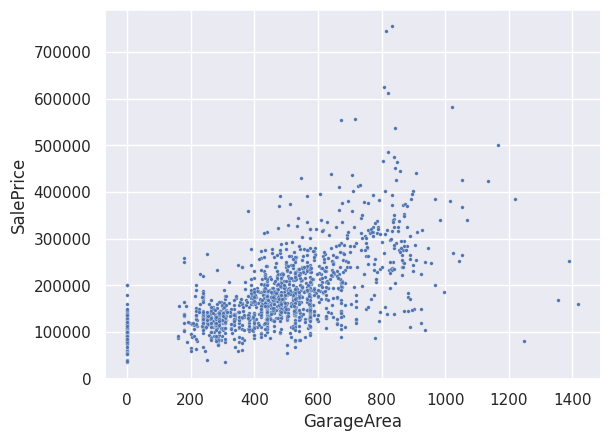

In [539]:
sns.scatterplot(data=df_train, y='SalePrice', x='GarageArea', s=7)

### SalePrice vs TotalBsmtSF

In [540]:
!cat data/houses/data_description.txt | grep -A 1 TotalBsmtSF

TotalBsmtSF: Total square feet of basement area



<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

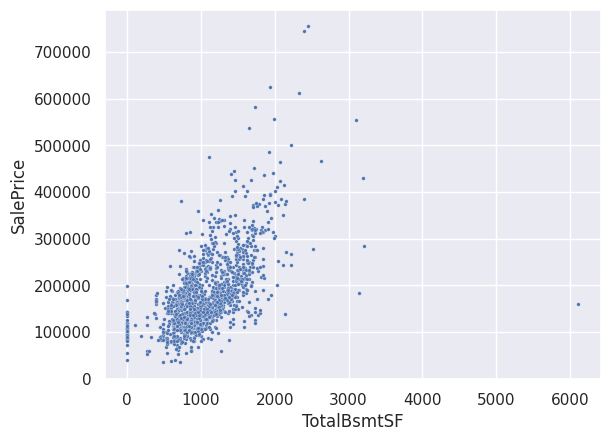

In [541]:
sns.scatterplot(data=df_train, y='SalePrice', x='TotalBsmtSF', s=7)

### SalePrice vs 1stFlrSF

In [542]:
!cat data/houses/data_description.txt | grep -A 1 1stFlrSF

1stFlrSF: First Floor square feet
 


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

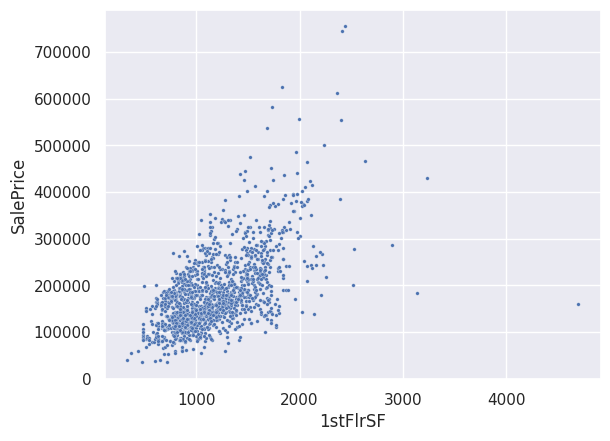

In [543]:
sns.scatterplot(data=df_train, y='SalePrice', x='1stFlrSF', s=7)

### SalePrice vs MasVnrArea

In [544]:
!cat data/houses/data_description.txt | grep -A 1 MasVnrArea

MasVnrArea: Masonry veneer area in square feet



<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

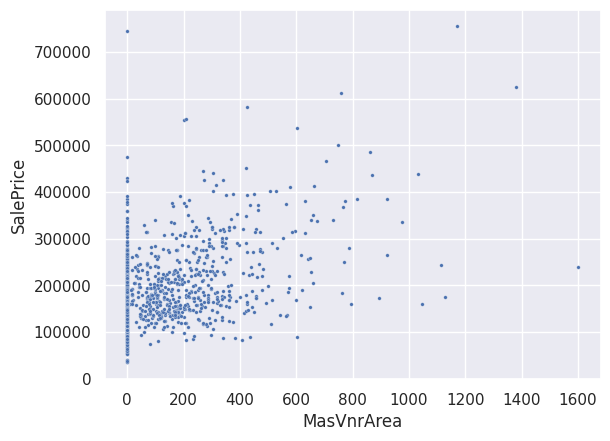

In [545]:
sns.scatterplot(data=df_train, y='SalePrice', x='MasVnrArea', s=7)

# Some more visualizations

Text(0.5, 1.0, 'Sale Price vs Kitchen')

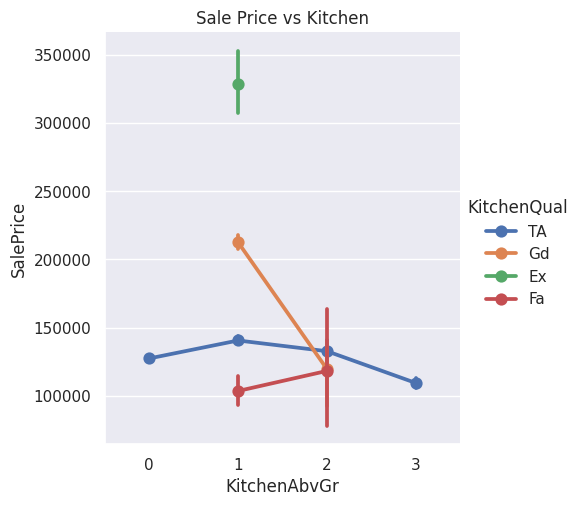

In [546]:
sns.catplot(
    x="KitchenAbvGr", y="SalePrice", data=df_train, kind="point", hue="KitchenQual"
)
plt.title("Sale Price vs Kitchen")

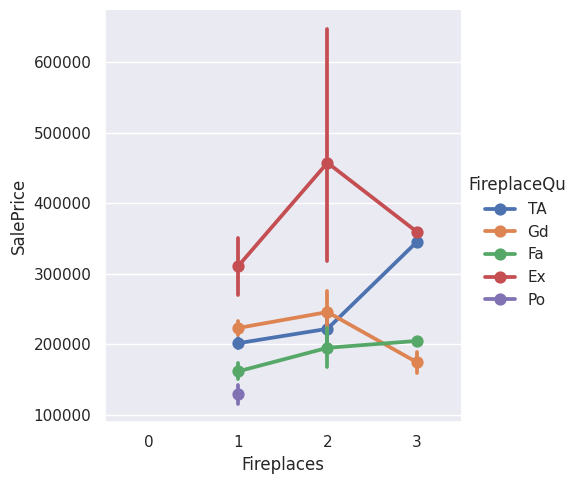

In [547]:
sns.catplot(x="Fireplaces", y="SalePrice", data=df_train, kind="point", hue="FireplaceQu")

Text(0.5, 1.0, 'Sale Price vs Streets')

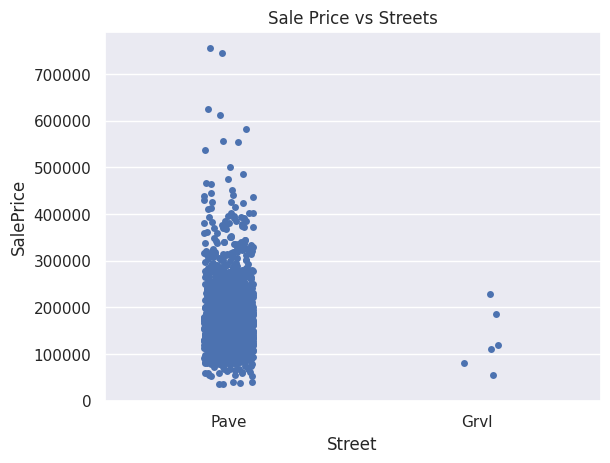

In [548]:
sns.stripplot(x=df_train["Street"], y=df_train["SalePrice"], jitter=True)
plt.title("Sale Price vs Streets")

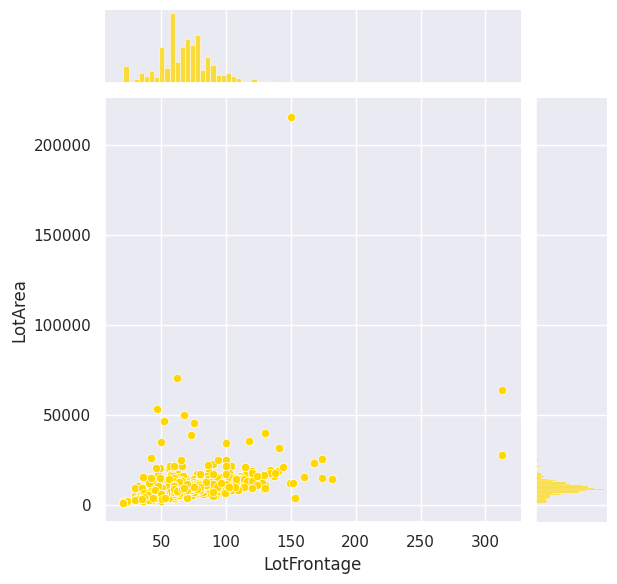

In [549]:
sns.jointplot(x=df_train["LotFrontage"], y=df_train["LotArea"], color="gold")

<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

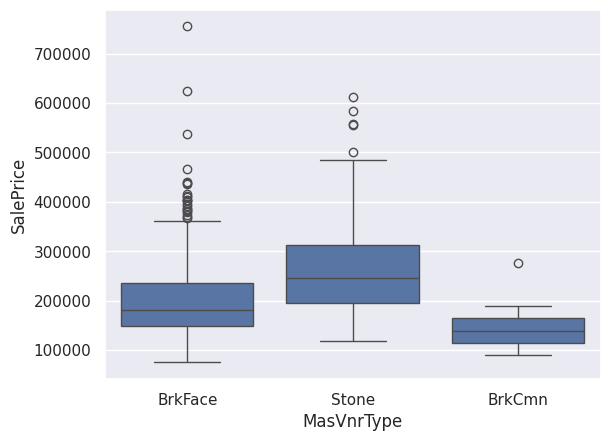

In [550]:
sns.boxplot(x="MasVnrType", y="SalePrice", data=df_train)

<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

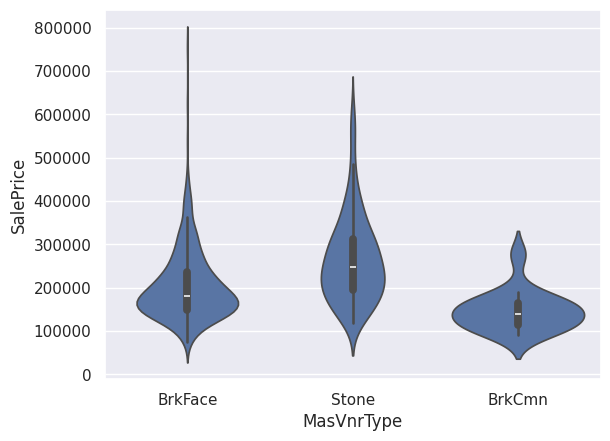

In [551]:
sns.violinplot(x="MasVnrType", y="SalePrice", data=df_train)

### Observations

 - Outliers
     - SalePrice vs. GrLivArea:
        - The two on the top-right edge of seem to follow a trend: As the prices increased, so did the area.
        - The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below.
     - SalePrice vs TotalBsmtSF
         - The one on the bottom right
 - Missing values imputation
 - Feature normalization
 - Make dummies for categorical features 
   - Remove features with more than 95-99% the same value

### Outliers

#### SalePrice vs. GrLivArea

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

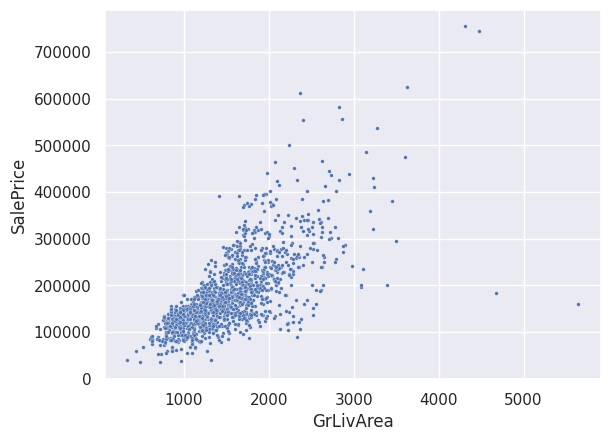

In [552]:
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea', s=7)

As you can see, there are two outliers in the plot.

We will get rid off them

In [553]:
df_outliners = df_train.loc[df_train.GrLivArea >= 4500]
df_outliners[['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
523,184750,4676
1298,160000,5642


In [554]:
outliner_replace = df_train.loc[(df_train.SalePrice >= 160_000) & (
    df_train.SalePrice <= 185_000)]["GrLivArea"].mean()
outliner_replace

1526.1565217391305

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

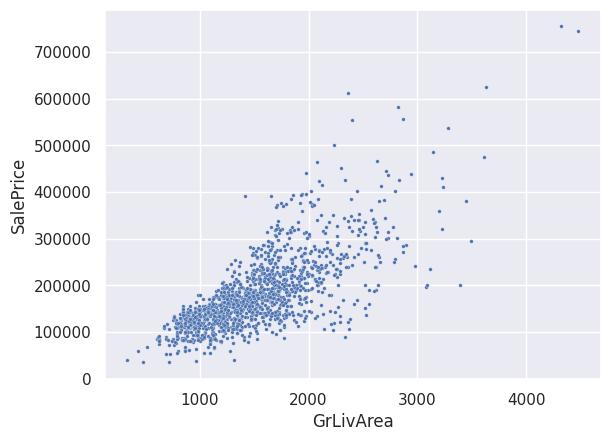

In [555]:
df_train.GrLivArea.loc[df_train.GrLivArea >= 4500] = outliner_replace
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea', s=7)

#### SalePrice vs TotalBsmtSF

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

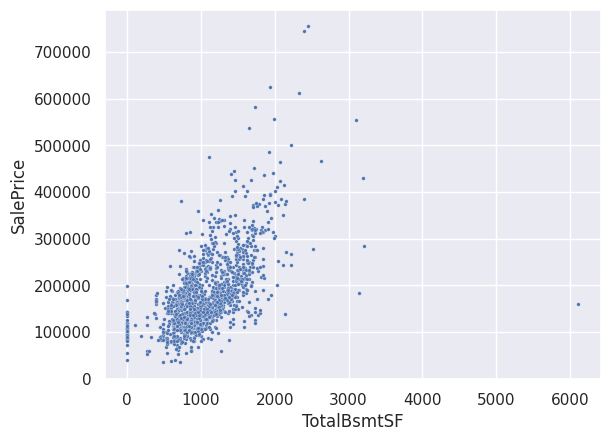

In [556]:
sns.scatterplot(data=df_train, y='SalePrice', x='TotalBsmtSF', s=7)

In [557]:
df_outliners = df_train.loc[df_train.TotalBsmtSF >= 4500]
df_outliners[['SalePrice', 'TotalBsmtSF']]

,SalePrice,TotalBsmtSF
1298,160000,6110


In [558]:
outliner_replace = df_train.loc[
    (df_train.SalePrice >= 160_000 - 1000) & (df_train.SalePrice <= 160_000 + 1000)
]["TotalBsmtSF"].mean()
outliner_replace

1110.6

In [559]:
df_train.TotalBsmtSF.loc[df_train.TotalBsmtSF >= 4500]

1298    6110
Name: TotalBsmtSF, dtype: int64

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

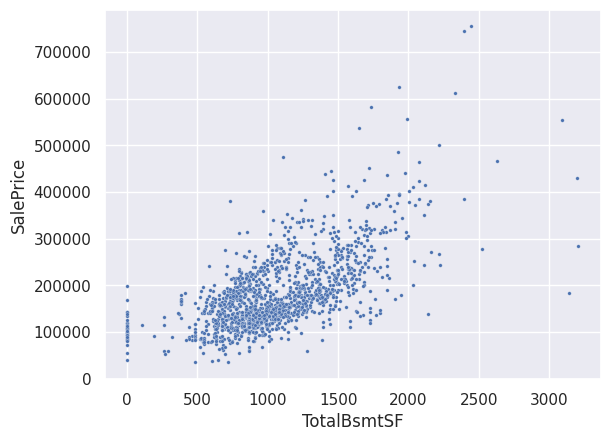

In [560]:
df_train.TotalBsmtSF.loc[df_train.TotalBsmtSF >= 4500] = outliner_replace
sns.scatterplot(data=df_train, y='SalePrice', x='TotalBsmtSF', s=7)

### Sale Price

How 1 single variable is distributed in numeric range. What is statistical summary of it. Is it positively skewed or negatively.

Text(0.5, 0, 'Sale Price')

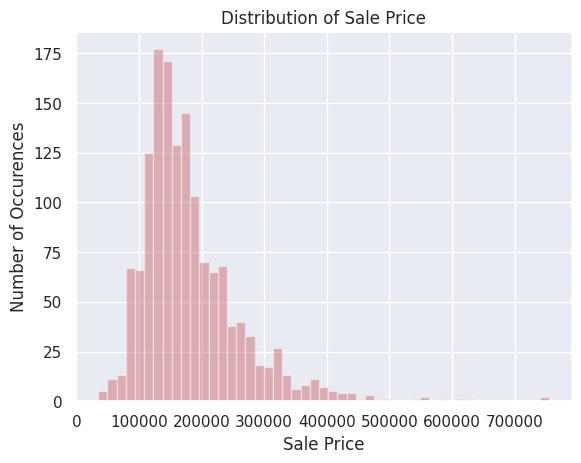

In [561]:
sns.distplot(df_train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

Prices are right skewed and graph shows some peakedness.

### Outliers

In [562]:
# there are some outliers.lets remove them.
upperlimit = np.percentile(df_train.SalePrice.values, 99.5)
upperlimit

527331.9149999974

In [563]:
df_train['SalePrice'].loc[df_train['SalePrice'] > upperlimit]

440     555000
691     755000
769     538000
803     582933
898     611657
1046    556581
1169    625000
1182    745000
Name: SalePrice, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Count'>

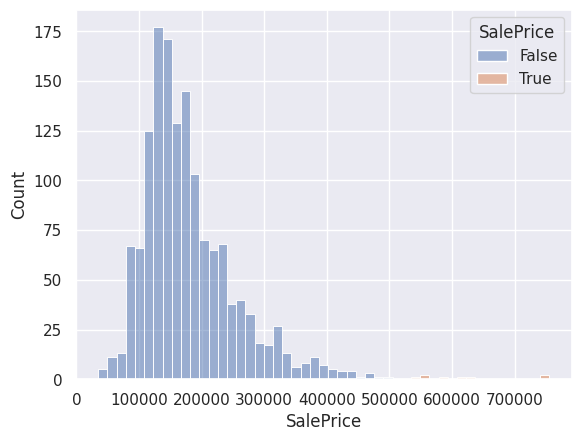

In [564]:
sns.histplot(x=df_train['SalePrice'], hue=(
    df_train['SalePrice'] > upperlimit), kde=False)

In [565]:
if 527331 < upperlimit:
    df_train['SalePrice'].loc[df_train['SalePrice'] > upperlimit] = upperlimit
    print("Changed!")

Changed!


Text(0.5, 0, 'Sale Price')

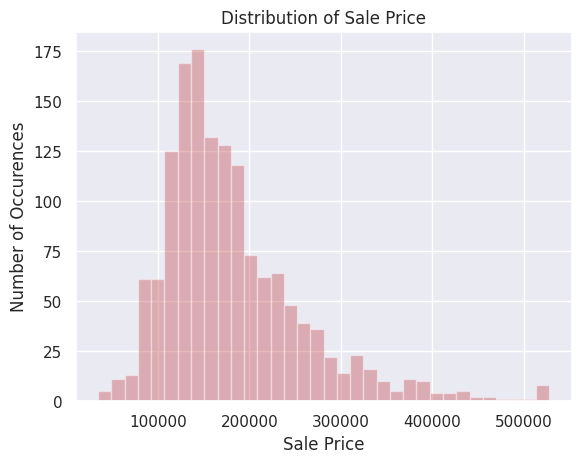

In [566]:
sns.distplot(df_train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

Text(0, 0.5, 'Sale Price')

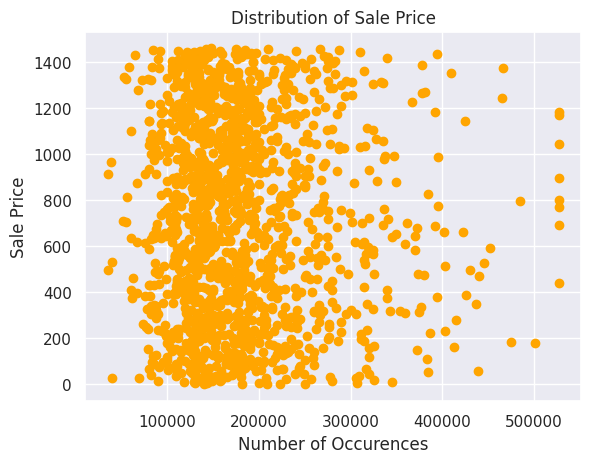

In [567]:
plt.scatter(df_train["SalePrice"].values, range(df_train.shape[0]),color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price")

# Missing Value Imputation

Missing values in the training data set can affect prediction or classification of a model negatively.

Also some machine learning algorithms can't accept missing data eg. SVM.

Filling missing values with:

 - mean
 - median
 - mode 
 - Data Understanding
 - using another predictive model: which handle missing values very well
     - Decision Trees 
     - Random Forest

In [568]:
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [569]:
# lets see if there are any columns with missing values
def missing(df):
    null_columns = df.columns[df.isnull().any()]
    missing_values = df[null_columns].isnull().sum()
    return missing_values


missing(df_train)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

WE WANT TO TAKE CARE OF BOTH TEST_SET AND TRAIN_SET

In [570]:
def get_miss_no():
    # Train
    null_columns = df_train.columns[df_train.isnull().any()]
    missing_values = df_train[null_columns].isnull().sum()
    # Test
    null_columns = df_test.columns[df_test.isnull().any()]
    missing_test_values = df_test[null_columns].isnull().sum()
    # Concat
    miss_no = pd.concat((missing_values, missing_test_values),
                        axis=1, names=['Train', 'Test'])
    # Rename
    miss_no = miss_no.rename(columns={
        0: 'Train',
        1: 'Test'
    })
    return miss_no


get_miss_no()

,Train,Test
LotFrontage,259.0,227.0
Alley,1369.0,1352.0
MasVnrType,872.0,894.0
MasVnrArea,8.0,15.0
BsmtQual,37.0,44.0
BsmtCond,37.0,45.0
BsmtExposure,38.0,44.0
BsmtFinType1,37.0,42.0
BsmtFinType2,38.0,42.0
Electrical,1.0,NaN


In [571]:
df_all = pd.concat((df_train, df_test), axis=0).reset_index()
del df_train
del df_test
df_all = df_all[f_interest]

In [572]:
df_all.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'GarageYrBlt', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'CentralAir', 'KitchenQual',
       'KitchenAbvGr', 'Fireplaces', 'FireplaceQu', '2ndFlrSF', 'PoolArea'],
      dtype='object')

In [573]:
f_interest

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'CentralAir',
 'KitchenQual',
 'KitchenAbvGr',
 'Fireplaces',
 'FireplaceQu',
 '2ndFlrSF',
 'PoolArea']

In [574]:
null_columns = df_all.columns[df_all.isnull().any()]
missing_values = df_all[null_columns].isnull().sum()

f_missing = [
    f_missing for f_missing in missing_values.index if f_missing in f_interest and f_missing != "SalePrice"
]
missing_values[f_missing]

GarageCars        1
GarageArea        1
GarageYrBlt     159
TotalBsmtSF       1
KitchenQual       1
FireplaceQu    1420
dtype: int64

In [575]:
# EXERCICE ! 

### TotalBsmtSF

In [576]:
df_all.shape

(2919, 19)

In [577]:
df_all = df_all[~df_all["TotalBsmtSF"].isnull() == True]
df_all = df_all[~df_all["KitchenQual"].isnull() == True]

df_all.shape

(2917, 19)

### Garages

<Axes: xlabel='GarageArea', ylabel='Count'>

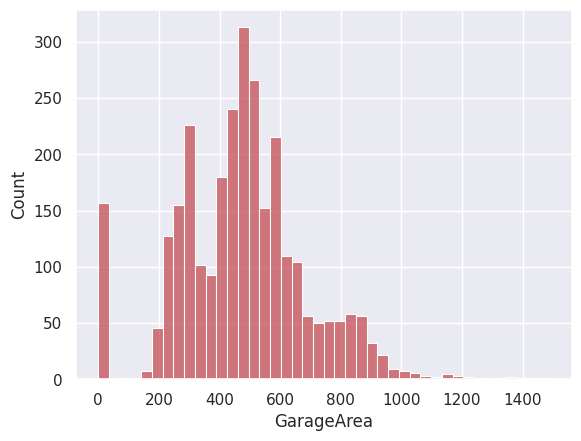

In [578]:
sns.histplot(df_all["GarageArea"], color='r', kde=False)

Text(0.5, 0, 'Garage Area in sq feet')

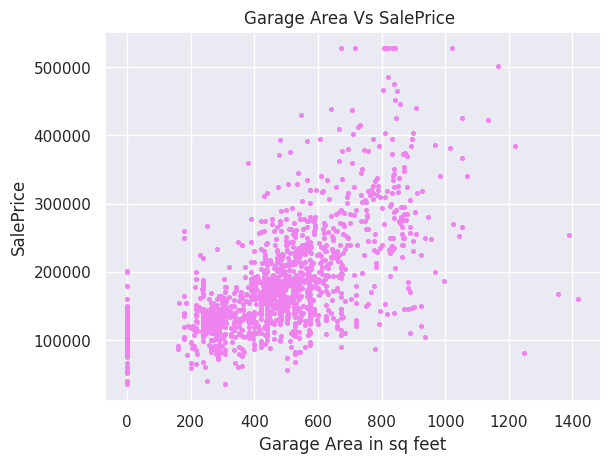

In [579]:
# GarageArea has got some outliers lets remove them.
upperlimit = np.percentile(df_all.GarageArea.values, 99.5)
df_all['GarageArea'].loc[df_all['GarageArea'] > upperlimit] = upperlimit

plt.scatter(df_all.GarageArea, df_all["SalePrice"].values, color='violet', s=7)
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet")

Text(0.5, 0, 'Number of Garage cars')

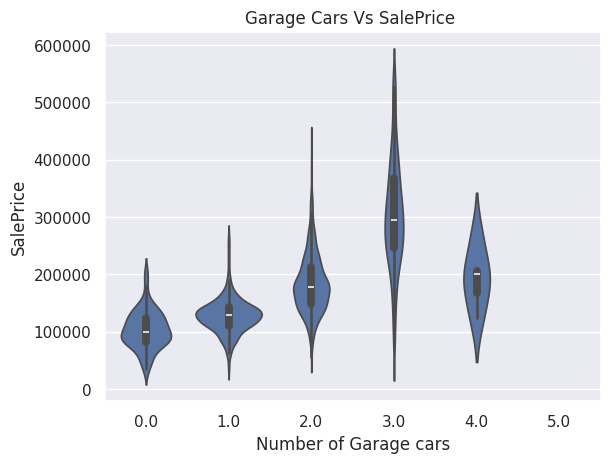

In [580]:
sns.violinplot(x=df_all["GarageCars"], y=df_all["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars")

In [581]:
garage_cols = [
    'GarageYrBlt','GarageCars', 'GarageArea'
]
df_all[garage_cols][df_all["GarageYrBlt"].isnull() == True]

,GarageYrBlt,GarageCars,GarageArea
39,NaN,0.0,0.0
48,NaN,0.0,0.0
78,NaN,0.0,0.0
88,NaN,0.0,0.0
89,NaN,0.0,0.0
...,...,...,...
2893,NaN,0.0,0.0
2909,NaN,0.0,0.0
2913,NaN,0.0,0.0
2914,NaN,0.0,0.0


All garage related features are missing values in same rows. that means we can replace categorical variables with None and continuous ones with 0.

In [582]:
# df_all['GarageYrBlt'].dtype

In [583]:
for col in garage_cols:
    print(f"{col}: {df_all[col].dtype}")
    if df_all[col].dtype == object:
        df_all[col] = df_all[col].fillna('None')
    else:
        df_all[col] = df_all[col].fillna(0)

GarageYrBlt: float64
GarageCars: float64
GarageArea: float64


In [584]:
# If fireplace quality is missing that means that house doesn't have a fireplace
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")

## Verification

In [585]:
null_columns = df_all.columns[df_all.isnull().any()]
missing_values = df_all[null_columns].isnull().sum()

f_missing = [
    f_missing
    for f_missing in missing_values.index
    if f_missing in f_interest and f_missing != "SalePrice"
]
missing_values[f_missing]

Series([], dtype: int64)

In [586]:
# Let's confirm that we have removed all missing values
missing(df_all)

SalePrice    1457
dtype: int64

# Feature Engineering


In [588]:
f_interest

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'CentralAir',
 'KitchenQual',
 'KitchenAbvGr',
 'Fireplaces',
 'FireplaceQu',
 '2ndFlrSF',
 'PoolArea']

## Features

### Features Association

In [589]:
# Could also be done with a PCA on the features, and then keeping for each group the first PCA_component
# feture engineering a new feature "TotalFS"
df_all['TotalSF'] = (df_all['TotalBsmtSF']
                     + df_all['1stFlrSF']
                     + df_all['2ndFlrSF'])

### Booleans

In [590]:
df_all['haspool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has2ndfloor'] = df_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasgarage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasbsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasfireplace'] = df_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### Removing Features

### Creating dummies

In [592]:
f_quantitative = [f for f in df_all.columns if df_all.dtypes[f] != 'object']
f_qualitative = [f for f in df_all.columns if df_all.dtypes[f] == 'object']
f_qualitative

['CentralAir', 'KitchenQual', 'FireplaceQu']

In [593]:
# Creating dummy variable
df_all_dummies = pd.get_dummies(df_all).reset_index(drop=True)
df_all_dummies.shape

(2917, 34)

In [613]:
df_all_dummies.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'GarageYrBlt', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'KitchenAbvGr', 'Fireplaces', '2ndFlrSF',
       'PoolArea', 'TotalSF', 'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt',
       'hasfireplace', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None',
       'FireplaceQu_Po', 'FireplaceQu_TA'],
      dtype='object')

In [614]:
non_categorical_features = [c for c in df_all_dummies.columns if c not in f_qualitative]

df_all_dummies = df_all_dummies[non_categorical_features]
df_all_dummies.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'GarageYrBlt', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'KitchenAbvGr', 'Fireplaces', '2ndFlrSF',
       'PoolArea', 'TotalSF', 'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt',
       'hasfireplace', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None',
       'FireplaceQu_Po', 'FireplaceQu_TA'],
      dtype='object')

### Removing overfit features

In [615]:
def overfit_reducer(df, max_overfit=99):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for feature in df.columns:
        counts = df[feature].value_counts()
        zeros = counts.iloc[0]
        ratio = zeros / len(df)
        if ratio * 100 > max_overfit:
            print(f"{feature:21} = {ratio * 100:3.4}%")
            overfit.append(feature)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(df_all_dummies, 98)

PoolArea              = 99.55%
haspool               = 99.55%
FireplaceQu_Ex        = 98.53%
FireplaceQu_Po        = 98.42%


In [616]:
overfitted_features = ["PoolArea", "FireplaceQu_Po"]

In [617]:
df_all_reduced = df_all_dummies.drop(overfitted_features, axis=1)

In [624]:
df_train = df_all_reduced.loc[~df_all_reduced["SalePrice"].isna()]
df_test = df_all_reduced.loc[df_all_reduced["SalePrice"].isna()]

In [629]:
df_train

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,GarageYrBlt,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,KitchenAbvGr,Fireplaces,2ndFlrSF,TotalSF,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA
0,208500.0,7,1710.0,2.0,548.0,2003.0,856.0,856,2,8,2003,2003,1,0,854,2566.0,0,1,1,1,0,False,True,False,False,True,False,False,False,False,True,False
1,181500.0,6,1262.0,2.0,460.0,1976.0,1262.0,1262,2,6,1976,1976,1,1,0,2524.0,0,0,1,1,1,False,True,False,False,False,True,False,False,False,False,True
2,223500.0,7,1786.0,2.0,608.0,2001.0,920.0,920,2,6,2001,2002,1,1,866,2706.0,0,1,1,1,1,False,True,False,False,True,False,False,False,False,False,True
3,140000.0,7,1717.0,3.0,642.0,1998.0,756.0,961,1,7,1915,1970,1,1,756,2473.0,0,1,1,1,1,False,True,False,False,True,False,False,False,True,False,False
4,250000.0,8,2198.0,3.0,836.0,2000.0,1145.0,1145,2,9,2000,2000,1,1,1053,3343.0,0,1,1,1,1,False,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647.0,2.0,460.0,1999.0,953.0,953,2,7,1999,2000,1,1,694,2600.0,0,1,1,1,1,False,True,False,False,False,True,False,False,False,False,True
1456,210000.0,6,2073.0,2.0,500.0,1978.0,1542.0,2073,2,7,1978,1988,1,2,0,3615.0,0,0,1,1,1,False,True,False,False,False,True,False,False,False,False,True
1457,266500.0,7,2340.0,1.0,252.0,1941.0,1152.0,1188,2,9,1941,2006,1,2,1152,3492.0,0,1,1,1,1,False,True,False,False,True,False,False,False,True,False,False
1458,142125.0,5,1078.0,1.0,240.0,1950.0,1078.0,1078,1,5,1950,1996,1,0,0,2156.0,0,0,1,1,0,False,True,False,False,True,False,False,False,False,True,False


# Fitting Model

In [625]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train["SalePrice"]

## Simple fit: LinearRegression

In [626]:
# Train test s
from sklearn.model_selection import train_test_split
# Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.33, random_state=42)

In [627]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((978, 31), (978,), (482, 31), (482,))

In [633]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object
pipe = make_pipeline(StandardScaler(), LinearRegression())

# fit the whole pipeline
pipe.fit(X_train, y_train)

# we can now use it like any other estimator
mean_squared_error(y_test, pipe.predict(X_test))

840944413.2736043

### Cross Validation

In [636]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
cv = KFold(shuffle=True, random_state=42, n_splits=10)
scores = cross_val_score(pipe, X, y, cv=cv, scoring="neg_mean_squared_error")

In [637]:
scores.mean()

-843918721.2907112